In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('/kaggle/input/bmw-global-sales-analysis/BMW sales data (2010-2024) (1).csv')

In [5]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (50000, 11)

First 5 rows:
       Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


In [6]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
                Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000


In [7]:
print("\nMedian values:\n", df.median(numeric_only=True))
print("\nMode values:\n", df.mode().iloc[0])


Median values:
 Year               2017.0
Engine_Size_L         3.2
Mileage_KM       100388.5
Price_USD         75011.5
Sales_Volume       5087.0
dtype: float64

Mode values:
 Model                   7 Series
Year                        2022
Region                      Asia
Color                        Red
Fuel_Type                 Hybrid
Transmission              Manual
Engine_Size_L                3.8
Mileage_KM                136842
Price_USD                  30948
Sales_Volume                9502
Sales_Classification         Low
Name: 0, dtype: object


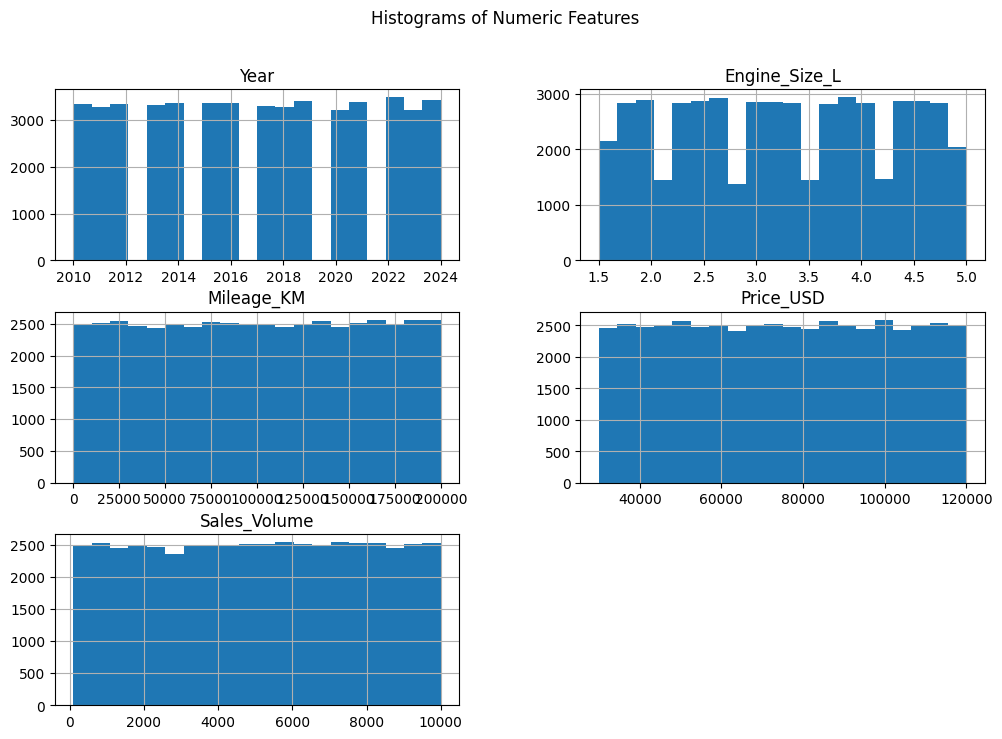

In [10]:
# Histogram of numerical columns
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()



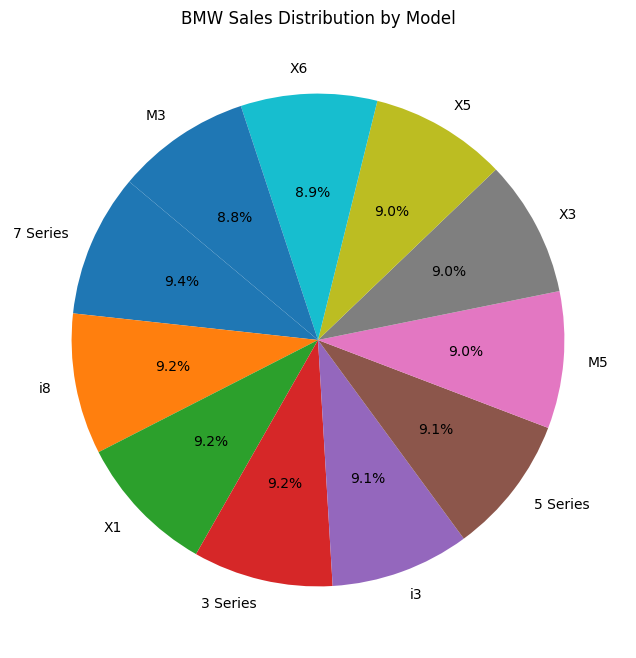

In [27]:
model_sales = df.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False)

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(model_sales, labels=model_sales.index, autopct="%1.1f%%", startangle=140)
plt.title("BMW Sales Distribution by Model")
plt.show()

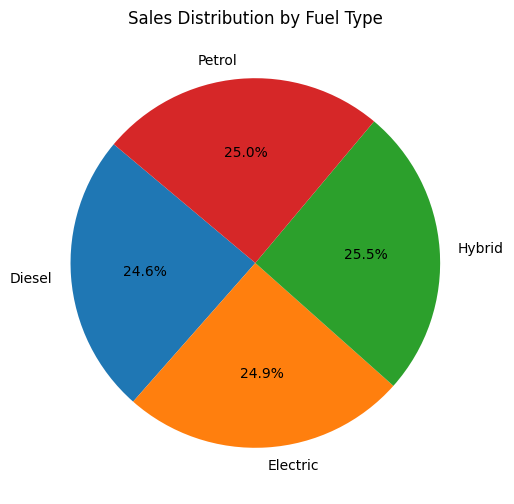

In [28]:
# Sales by Fuel Type
fuel_sales = df.groupby("Fuel_Type")["Sales_Volume"].sum()

plt.figure(figsize=(6,6))
plt.pie(fuel_sales, labels=fuel_sales.index, autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Fuel Type")
plt.show()

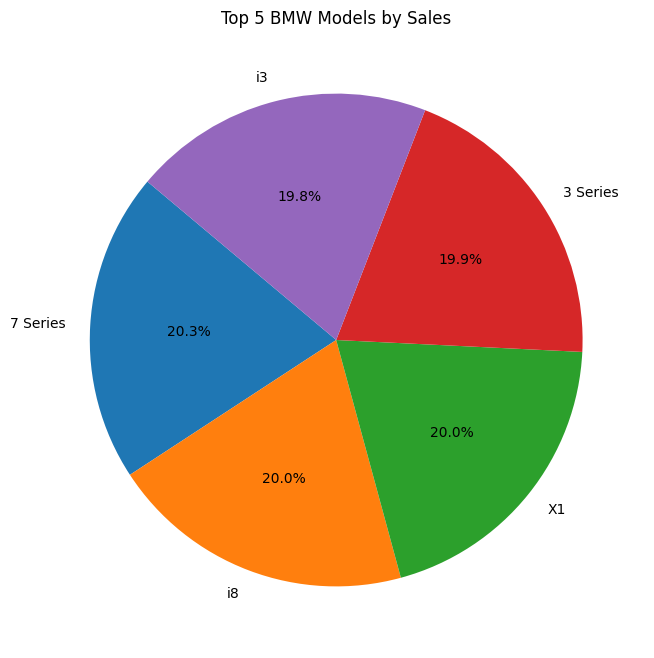

In [29]:
# Top 5 Models
top5_models = df.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.pie(top5_models, labels=top5_models.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 5 BMW Models by Sales")
plt.show()

In [15]:
# Which region contributes most to sales
top_region = df.groupby("Region")['Sales_Volume'].sum().sort_values(ascending=False)
print("\nSales by Region:\n", top_region)


Sales by Region:
 Region
Asia             42974277
Europe           42555138
North America    42402629
Middle East      42326620
Africa           41565252
South America    41551818
Name: Sales_Volume, dtype: int64


In [16]:
# Average price per region
avg_price_region = df.groupby("Region")['Price_USD'].mean().sort_values(ascending=False)
print("\nAverage Price by Region:\n", avg_price_region)



Average Price by Region:
 Region
Asia             75554.925006
North America    75070.054709
Europe           74988.356851
South America    74973.598837
Africa           74885.771598
Middle East      74726.788487
Name: Price_USD, dtype: float64


/tmp/ipykernel_36/2298805345.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="Sales_Volume", data=df, estimator="sum", ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


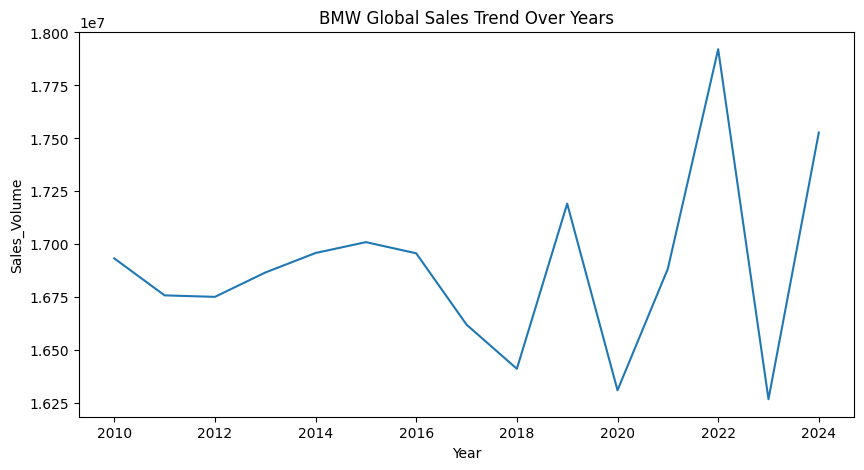

In [22]:
# Sales over time
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Sales_Volume", data=df, estimator="sum", ci=None)
plt.title("BMW Global Sales Trend Over Years")
plt.show()

In [ ]:
# 4. Correlation
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


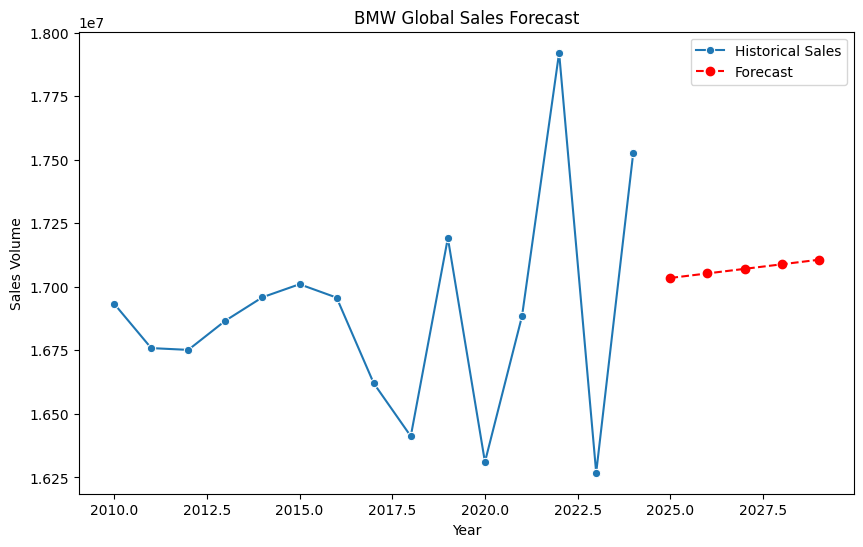

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

yearly_sales = df.groupby("Year")["Sales_Volume"].sum().reset_index()

# Prepare data for regression
X = yearly_sales["Year"].values.reshape(-1, 1)
y = yearly_sales["Sales_Volume"].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(yearly_sales["Year"].max()+1, yearly_sales["Year"].max()+6).reshape(-1,1)
future_preds = model.predict(future_years)

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Sales_Volume", data=yearly_sales, marker="o", label="Historical Sales")
plt.plot(future_years, future_preds, marker="o", linestyle="--", color="red", label="Forecast")
plt.title("BMW Global Sales Forecast")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.show()